# INTRODUCTION

Since I'm working in the transportation and supply chain industry, the goal of this notebook is to compare the three companies within this industry in the S&P 500 list namely Expeditors International of Washington (EXPD), Federal Express (FDX), and United Parcel Service (UPS). I would like to discover which company has been showing a consistent profit over the past 5 years as compared to the other firms, as well as if there is any trend/seasonality within the timeseries data.


**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, concat
import matplotlib
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime as dt

In [2]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

**Importing Dataset**

In [3]:
EXPD = pd.read_csv(r'C:\Users\ams-duongn.EXPEDITORS\Desktop\learn\Data Science Master\M5W2\individual_stocks_5yr\individual_stocks_5yr\EXPD_data.csv')
EXPD.dataframeName = 'Expeditors_stocks_5yr.csv'
FDX = pd.read_csv(r'C:\Users\ams-duongn.EXPEDITORS\Desktop\learn\Data Science Master\M5W2\individual_stocks_5yr\individual_stocks_5yr\FDX_data.csv')
FDX.dataframeName = 'FedEx_stocks_5yr.csv'
UPS = pd.read_csv(r'C:\Users\ams-duongn.EXPEDITORS\Desktop\learn\Data Science Master\M5W2\individual_stocks_5yr\individual_stocks_5yr\UPS_data.csv')
UPS.dataframeName = 'UPS_stocks_5yr.csv'

Here, I will be displaying the last 5 values instead of the first 5 since the bottom values are of the year 2018. This dataset shows stock prices over the range of 5 years.

In [4]:
EXPD.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,64.48,65.07,64.08,64.57,1321749,EXPD
1255,2018-02-02,64.33,64.57,63.33,63.61,965575,EXPD
1256,2018-02-05,63.46,64.01,61.75,61.78,1804620,EXPD
1257,2018-02-06,60.73,62.41,60.17,61.87,1799818,EXPD
1258,2018-02-07,61.64,62.92,61.38,62.13,1621406,EXPD


In [5]:
FDX.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,258.15,265.67,257.33,261.83,2318110,FDX
1255,2018-02-02,260.58,261.24,255.72,255.87,1655040,FDX
1256,2018-02-05,252.48,259.13,248.36,248.50,2315389,FDX
1257,2018-02-06,244.44,254.12,242.51,250.18,3366219,FDX
1258,2018-02-07,248.96,254.47,248.51,251.15,1520067,FDX


In [6]:
UPS.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,119.220,121.00,118.07,119.51,14405947,UPS
1255,2018-02-02,118.985,119.14,115.52,116.47,9235616,UPS
1256,2018-02-05,115.890,116.31,113.21,113.30,8119637,UPS
1257,2018-02-06,112.620,115.89,109.68,112.71,11749078,UPS
1258,2018-02-07,112.390,113.26,111.62,111.91,7219687,UPS


Federal Express has the highest stock price of $265.67 followed by United Parcel Services. 2018 demonstrated a more bullish tone for FedEx. Expeditors scores at the last position among the three. However, UPS has substantially higher trade volume than the other two companies.

In [7]:
EXPD['date'] = pd.to_datetime(EXPD['date'])
FDX['date'] = pd.to_datetime(FDX['date'])
UPS['date'] = pd.to_datetime(UPS['date'])

In [8]:
EXPD.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,47.808144,48.203866,47.416475,47.843268,1.390130e+06
std,6.779892,6.799957,6.742126,6.791217,7.918400e+05
min,34.890000,35.480000,34.830000,35.130000,3.033110e+05
25%,43.070000,43.470000,42.785000,43.150000,9.140570e+05
50%,46.850000,47.320000,46.450000,46.870000,1.201888e+06
75%,51.570000,51.853250,51.207500,51.525000,1.645045e+06
max,67.060000,67.540000,66.270000,67.050000,9.505045e+06


In [9]:
FDX.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,162.253983,163.561663,161.015567,162.317315,1.837186e+06
std,36.807281,36.984375,36.589292,36.801586,1.073987e+06
min,92.230000,92.850000,90.610000,91.870000,4.953650e+05
25%,138.105000,139.499000,137.060000,138.305000,1.205347e+06
50%,162.310000,163.820000,161.070000,162.650000,1.585972e+06
75%,182.275000,183.705000,181.245000,182.490000,2.158916e+06
max,273.950000,274.660000,271.320000,274.320000,1.512339e+07


In [10]:
UPS.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,102.510183,103.141055,101.908234,102.541755,3.027248e+06
std,9.626382,9.671643,9.536104,9.616115,1.413456e+06
min,81.750000,82.465000,81.510000,81.940000,8.917180e+05
25%,97.205000,97.832500,96.560000,97.245000,2.191935e+06
50%,102.380000,102.890000,101.700000,102.430000,2.767518e+06
75%,108.565000,109.265000,107.935000,108.660000,3.477050e+06
max,134.650000,135.530000,133.530000,134.090000,1.927536e+07


In [11]:
tc_list = ['EXPD', 'FDX', 'UPS']
tc_stock_list = [EXPD, FDX, UPS]
company_name = ['Expeditors', 'FedEx', 'UPS']

# EXPLORATORY DATA ANALYSIS (EDA)

**Correlation matrix**

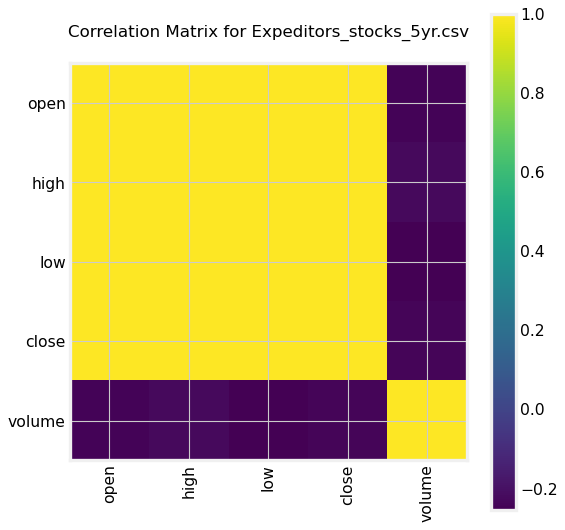

In [12]:
plotCorrelationMatrix(EXPD, 8)

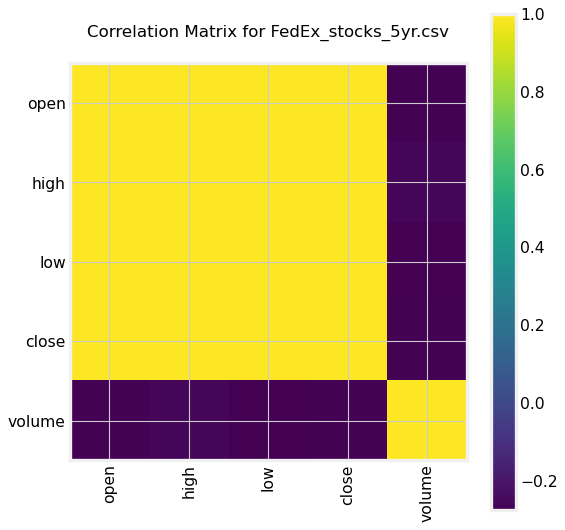

In [13]:
plotCorrelationMatrix(FDX, 8)

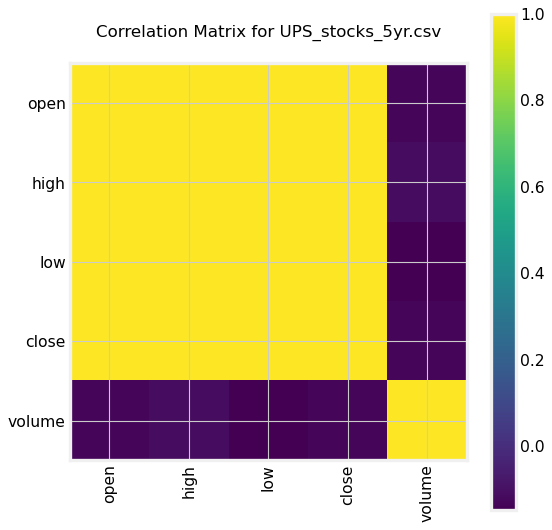

In [14]:
plotCorrelationMatrix(UPS, 8)

From the above three Correlation Matrix of five core metrics of Stock Price for each company chosen from the dataset, we can conclude that there is a high level of correlation among the Open, High, Low and Close Prices, whereas the trade volume statistically seems to have a much weeker dependency on these prices. We can also infer that the stock prices for these companies do not fluctuate heavily during the trading day.

**Relationship between Opening & Closing Price USD($)**

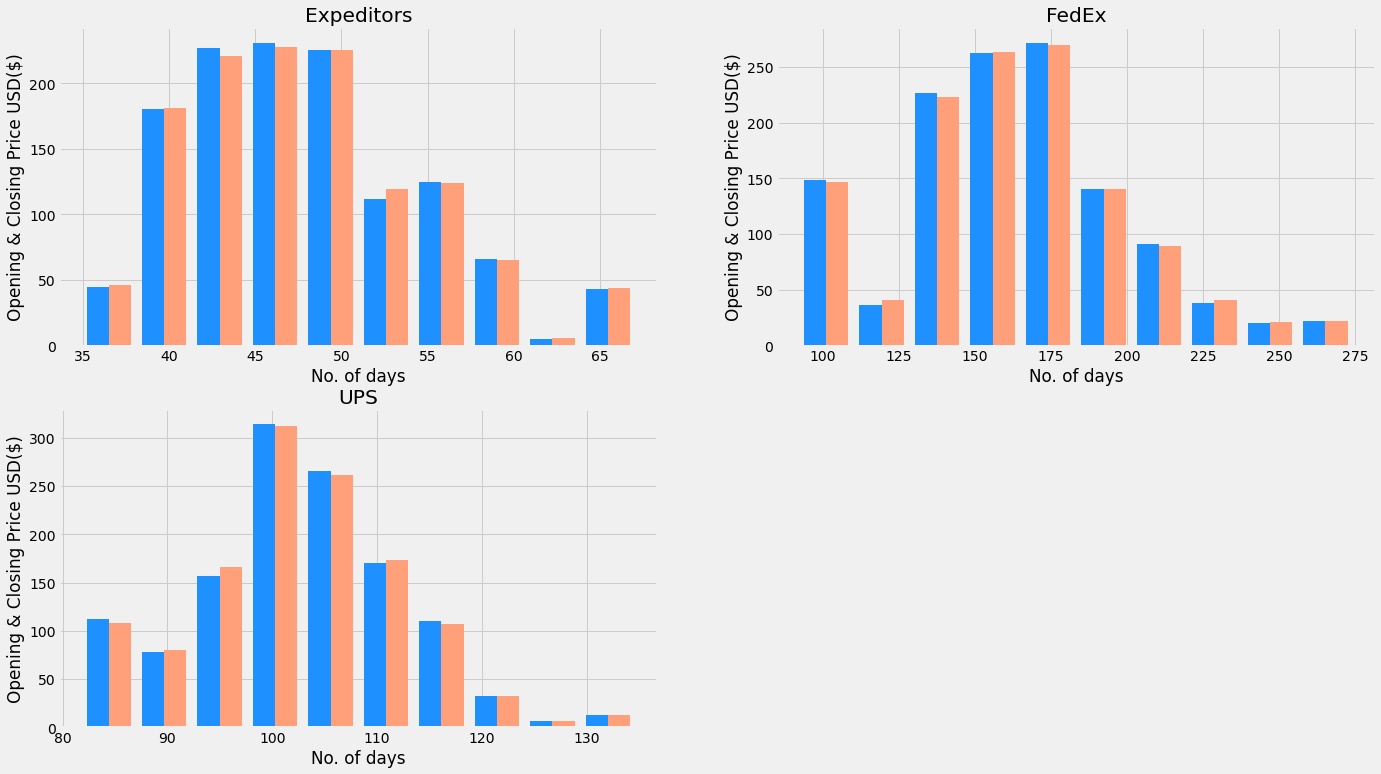

In [15]:
plt.figure(figsize = (21, 12))
for i, company in enumerate(tc_stock_list, 1):
    plt.subplot(2, 2, i)
    plt.hist([company['open'], company['close']], color = ["dodgerblue", "lightsalmon"])
    plt.ylabel("Opening & Closing Price USD($)")
    plt.xlabel("No. of days")
    plt.title(f"{company_name[i - 1]}")

Here with the bar chart, we can clearly demonstrate our conclusion from the metrix on the Open and Closing stock prices. It is also apparent that the stock prices for these companies open and close over the year do change substantially with UPS have the highest margin.

**Correlation of High & Low Stock Prices USD($)**

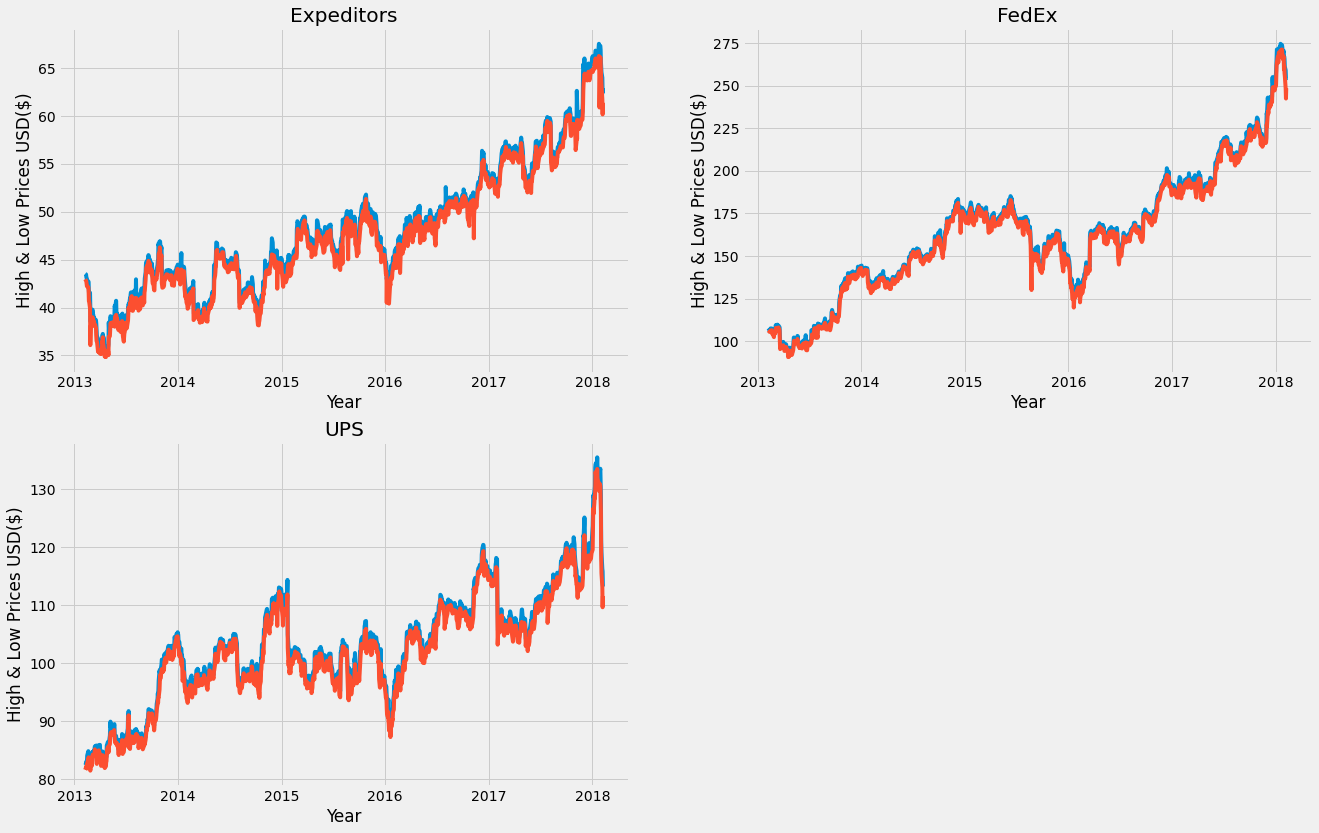

In [16]:
plt.figure(figsize = (20, 13))
for i, company in enumerate(tc_stock_list, 1):
    plt.subplot(2, 2, i)
    plt.plot(company['date'], company[['high','low']])
    plt.xlabel("Year")
    plt.ylabel("High & Low Prices USD($)")
    plt.title(f"{company_name[i - 1]}")

We can have similar conclusion for the High and Low Stock prices.

**Daily Volume**

c:\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\programs\python\python37\lib\site-packages\pandas\plo

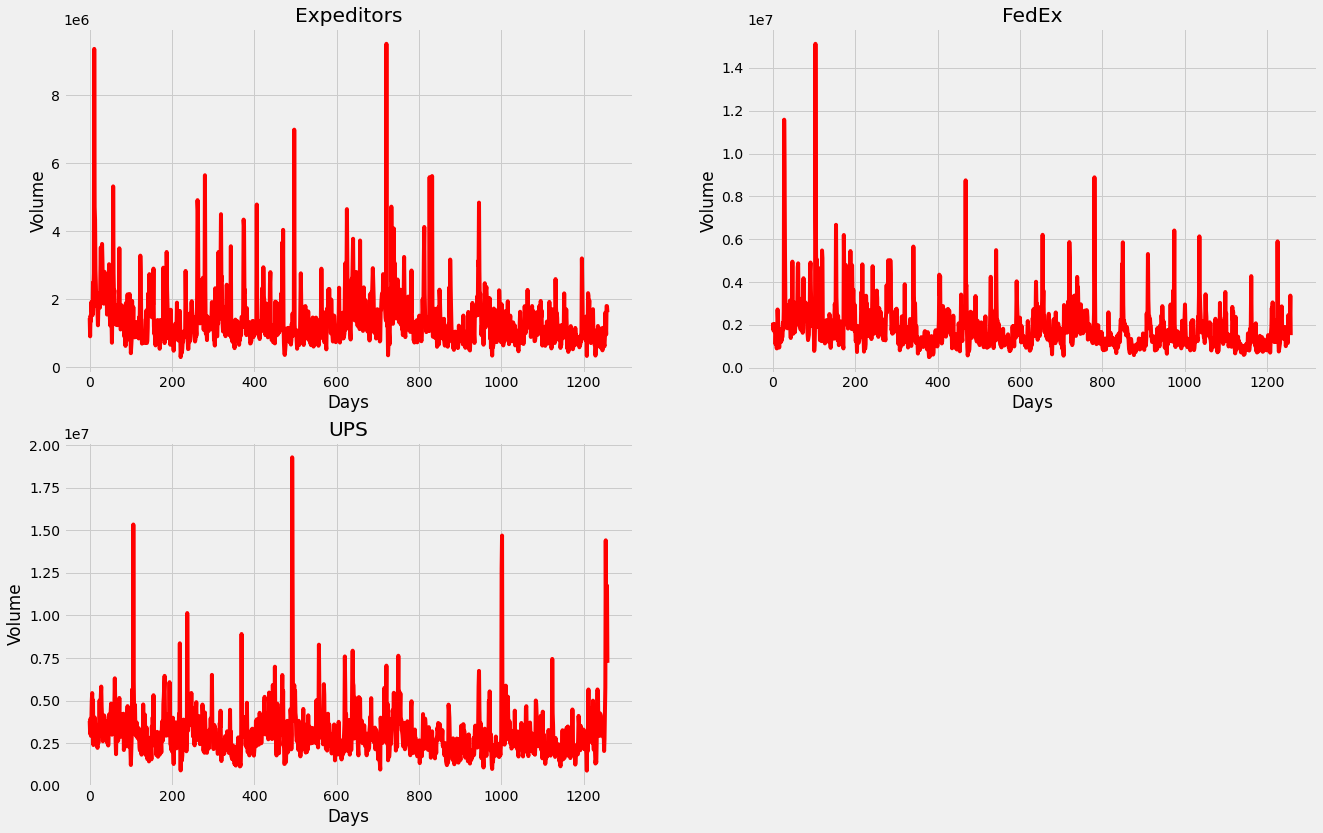

In [17]:
plt.figure(figsize = (20, 13))
for i, company in enumerate(tc_stock_list, 1):
    plt.subplot(2, 2, i)
    company["volume"].plot(color = "red")
    plt.ylabel("Volume")
    plt.xlabel("Days")
    plt.title(f"{company_name[i - 1]}")

From the trade volume line charts above, we can clearly see several spikes in volume over the time series, what is causing this spike?

**Correlation between Volume and High Price USD ($)**

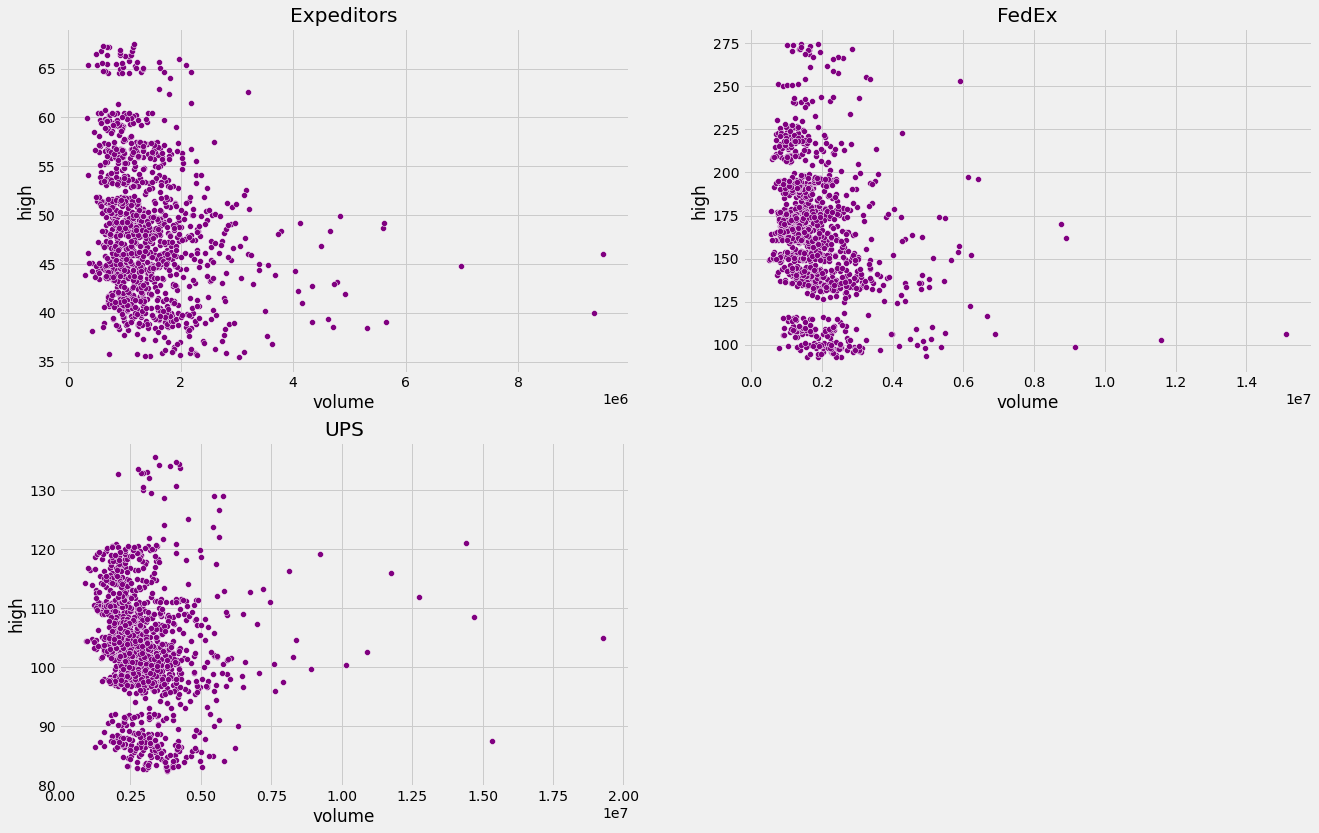

In [18]:
matplotlib.pyplot.figure(figsize = (20, 13))
for i, company in enumerate(tc_stock_list, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x = company['volume'], y = company['high'], color = 'purple')
    plt.title(f"{company_name[i - 1]}")   

Although volume has a negative correlation with high, low, opening and closing prices, volume turns out to be very useful to predict bullish signs. For instance, volume increases on a price decline and then the price moves higher, followed by a move back lower. If the price on the move back lower doesn't fall below the previous low, and volume is diminished on the second decline, then this is usually interpreted as a bullish sign. All these charts show more volume towards the lower spectrum of high price. 

**Close Price History**

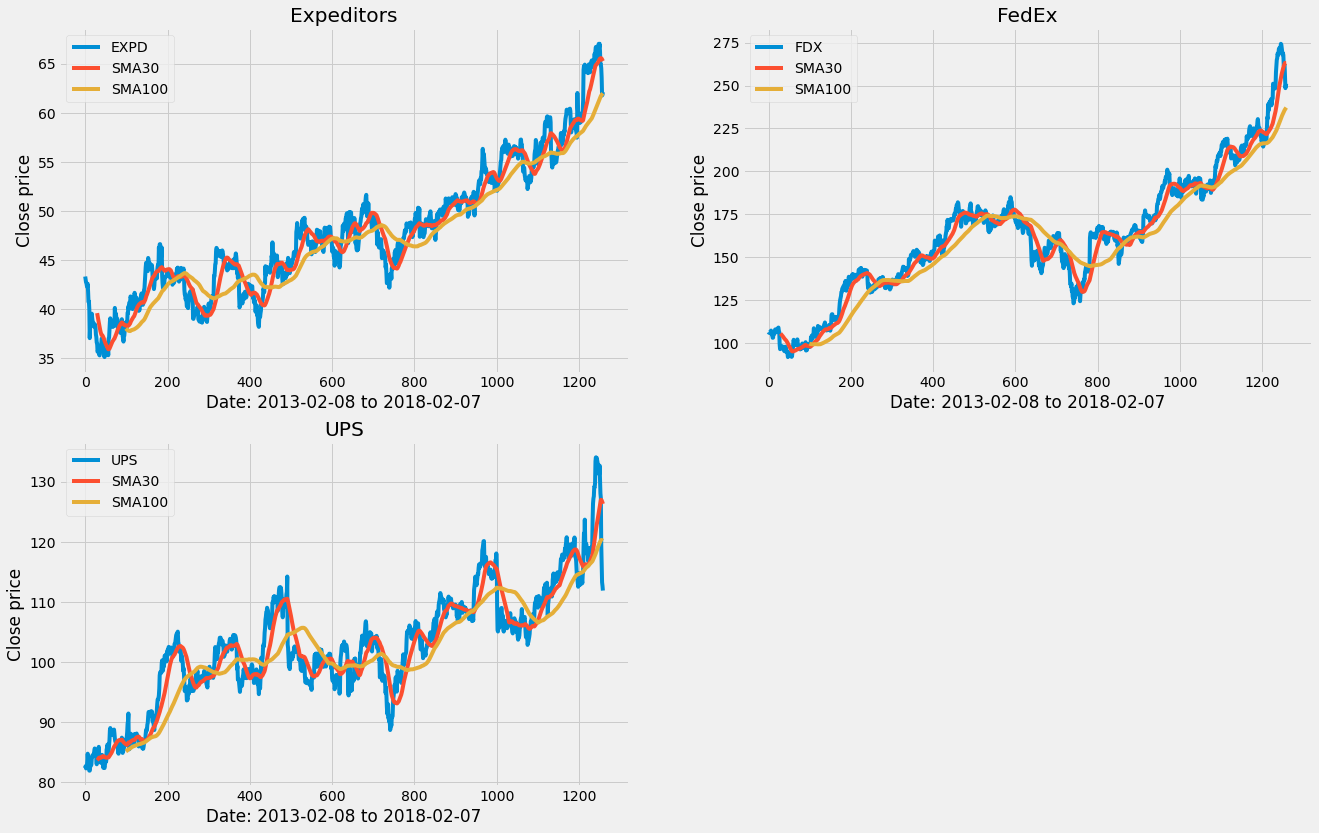

In [19]:
plt.figure(figsize = (20, 13))
sma30 = []
sma100 = []
for i, company in enumerate(tc_stock_list, 1):
    plt.subplot(2, 2, i)
    avg30day = pd.DataFrame()
    avg30day['close'] = company['close'].rolling(window = 30).mean()
    sma30.append(avg30day)
    avg100day = pd.DataFrame()
    avg100day['close'] = company['close'].rolling(window = 100).mean()
    sma100.append(avg100day)
    plt.plot(company['close'], label = f"{tc_list[i - 1]}")
    plt.plot(avg30day['close'], label = 'SMA30')
    plt.plot(avg100day['close'], label = 'SMA100')
    plt.title(f"{company_name[i - 1]}")
    plt.xlabel("Date: 2013-02-08 to 2018-02-07")
    plt.ylabel("Close price")
    plt.legend(loc = "upper left")

The moving average lines show more transparent trend of the stock prices over time, with a strong positive development regardless of difficult market situation.

**Determining seasonality in stock close prices**

In [20]:
for i, company in enumerate(tc_stock_list, 1):
    company['day_of_week'] = company.date.dt.day_name()
    company['month'] = company.date.dt.month
    company['year'] = company.date.dt.year

FDX.head()

,date,open,high,low,close,volume,Name,day_of_week,month,year
0,2013-02-08,106.80,107.50,106.23,106.41,2101805,FDX,Friday,2,2013
1,2013-02-11,106.01,106.37,105.48,106.01,1746041,FDX,Monday,2,2013
2,2013-02-12,106.09,106.48,105.58,106.12,2044439,FDX,Tuesday,2,2013
3,2013-02-13,106.12,106.64,105.56,106.16,1740007,FDX,Wednesday,2,2013
4,2013-02-14,105.85,106.86,105.44,106.56,1660557,FDX,Thursday,2,2013


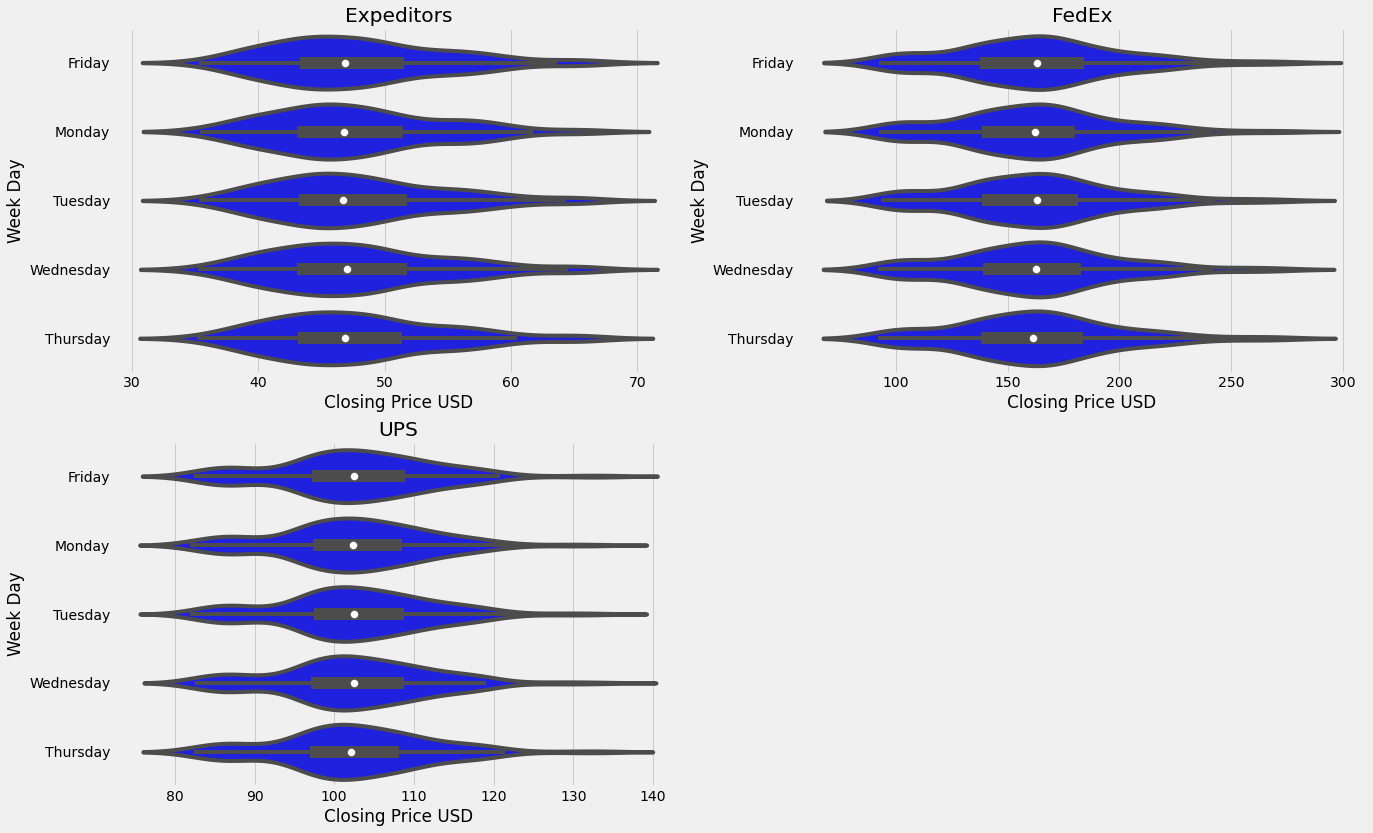

In [21]:
plt.figure(figsize = (20, 13))
for i, company in enumerate(tc_stock_list, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x = company['close'], y = company['day_of_week'], color = 'blue')
    plt.ylabel("Week Day")
    plt.xlabel("Closing Price USD")
    plt.title(f"{company_name[i - 1]}")

From the violin plots, we can conclude that there is no seasonality in the closing prices over the day of week, there is no favorite "Friday" from investors.

c:\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Stock Close Price (USD)')

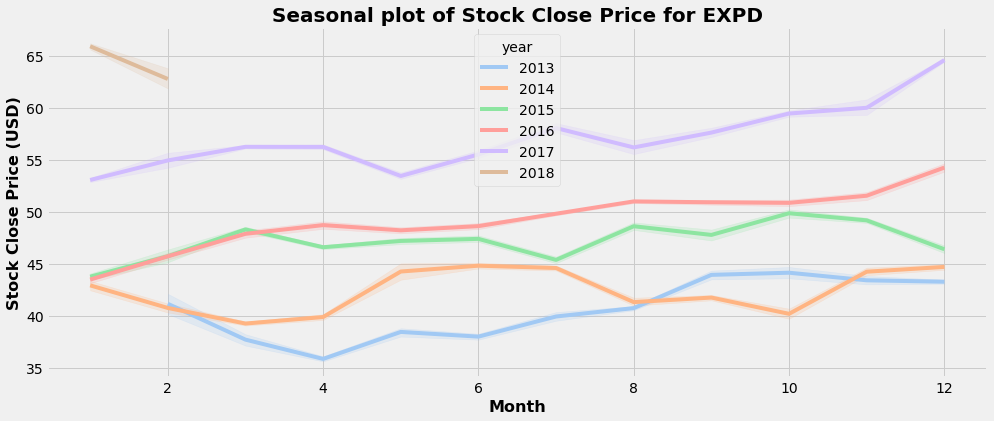

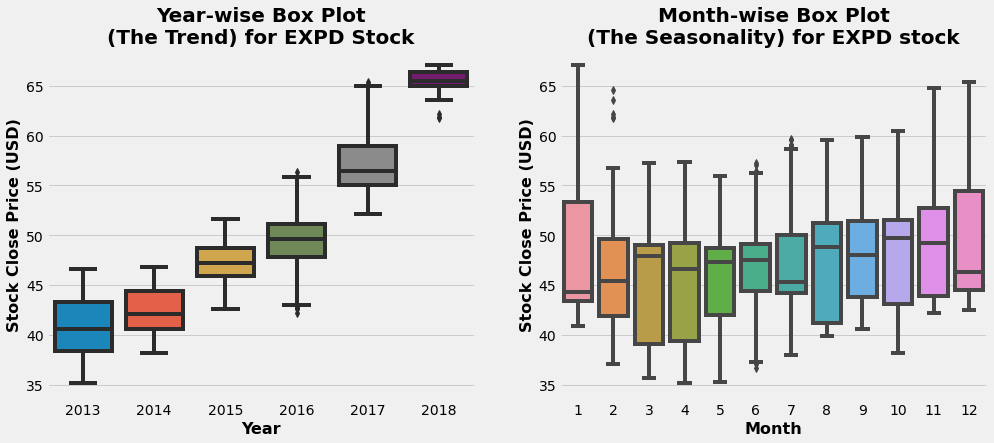

In [22]:
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("pastel", 6)
sns.lineplot(EXPD['month'], EXPD['close'], hue=EXPD['year'], palette=palette)
ax.set_title('Seasonal plot of Stock Close Price for EXPD', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Stock Close Price (USD)', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(EXPD['year'], EXPD['close'], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend) for EXPD Stock', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Stock Close Price (USD)', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(EXPD['month'], EXPD['close'], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality) for EXPD stock', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Stock Close Price (USD)', fontsize = 16, fontdict=dict(weight='bold'))

For Expeditors, from the month-wise box plot, we can conclude that in general April, July amd December are the slower months where the prices move downward whilst May is the month when the stock recovers and increases

c:\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Stock Close Price (USD)')

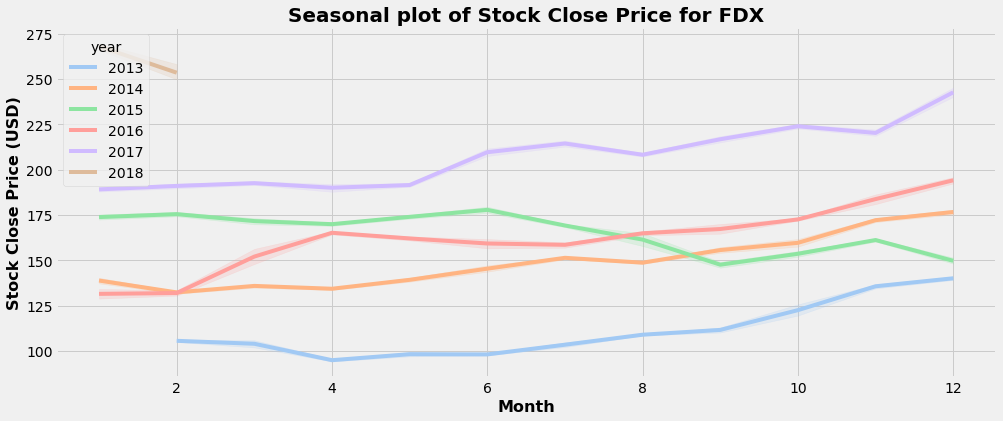

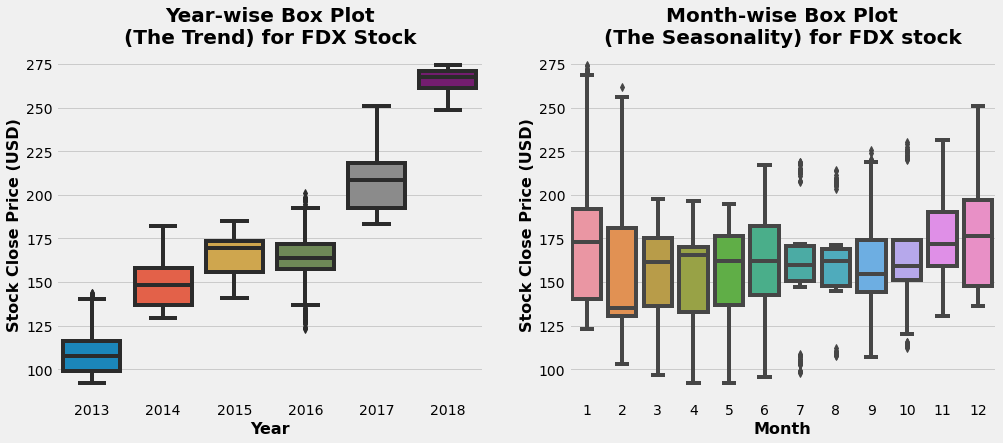

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("pastel", 6)
sns.lineplot(FDX['month'], FDX['close'], hue=FDX['year'], palette=palette)
ax.set_title('Seasonal plot of Stock Close Price for FDX', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Stock Close Price (USD)', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(FDX['year'], FDX['close'], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend) for FDX Stock', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Stock Close Price (USD)', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(FDX['month'], FDX['close'], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality) for FDX stock', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Stock Close Price (USD)', fontsize = 16, fontdict=dict(weight='bold'))

For Federal Express, from the month-wise box plot, we can conclude that in general September and February are the slower months where the prices move downward whilst April and November are the months when the stock recovers and increases

c:\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Stock Close Price (USD)')

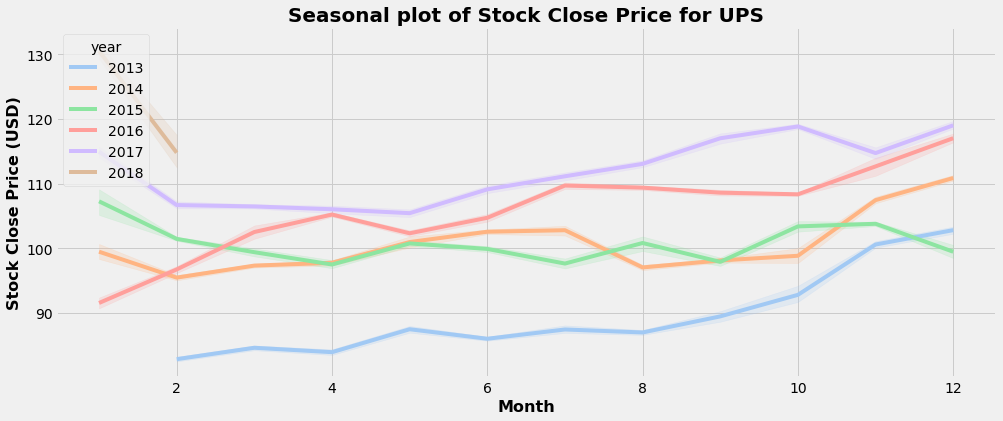

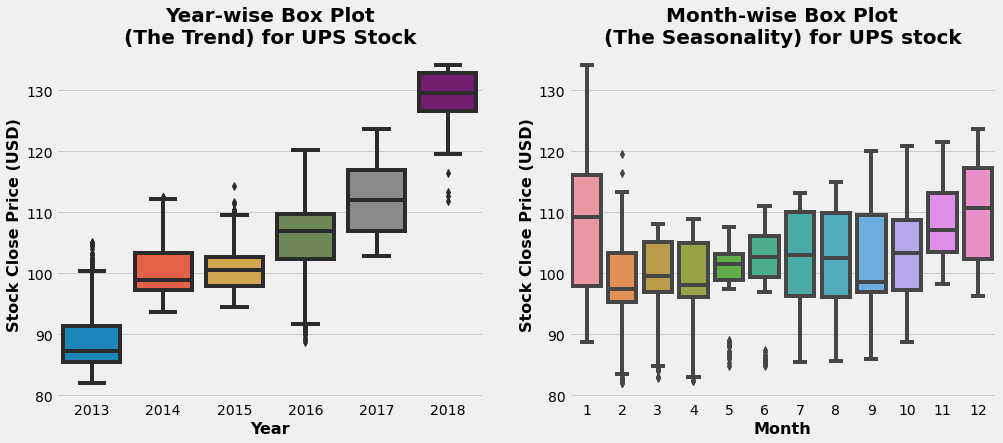

In [24]:
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("pastel", 6)
sns.lineplot(UPS['month'], UPS['close'], hue=UPS['year'], palette=palette)
ax.set_title('Seasonal plot of Stock Close Price for UPS', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Stock Close Price (USD)', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(UPS['year'], UPS['close'], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend) for UPS Stock', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Stock Close Price (USD)', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(UPS['month'], UPS['close'], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality) for UPS stock', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Stock Close Price (USD)', fontsize = 16, fontdict=dict(weight='bold'))

For United Parcel Express, from the month-wise box plot, we can conclude that in general April and September are the slower months where the prices move downward whilst May and October are the months when the stock recovers and increases